# ECS 171 Project - Detecting Phishing Websites
# label of 1 means not phishing, label of 0 means phishing

In [2]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/phishing_url_website.csv')
df.head(n=20)

URL                         Domain  \
0         https://www.southbankmosaics.com       www.southbankmosaics.com   
1                 https://www.uni-mainz.de               www.uni-mainz.de   
2           https://www.voicefmradio.co.uk         www.voicefmradio.co.uk   
3          https://www.globalreporting.org        www.globalreporting.org   
4               https://www.nerdscandy.com             www.nerdscandy.com   
5           https://www.hyderabadonline.in         www.hyderabadonline.in   
6                      https://www.aap.org                    www.aap.org   
7       https://www.religionenlibertad.com     www.religionenlibertad.com   
8                  http://www.teramill.com               www.teramill.com   
9                    https://www.aoh61.com                  www.aoh61.com   
10             https://www.bulgariaski.com            www.bulgariaski.com   
11               https://www.brightika.com              www.brightika.com   
12                   https://www.motley.ie                  www.motley.ie   
13                  https://www.funzine.hu                 www.funzine.hu   
14                 https://www.ooty.ind.in                www.ooty.ind.in   
15              https://www.bwresearch.com             www.bwresearch.com   
16   https://www.musicvideoproduction.guru  www.musicvideoproduction.guru   
17  https://service-mitld.firebaseapp.com/  service-mitld.firebaseapp.com   
18       http://www.kuradox92.lima-city.de     www.kuradox92.lima-city.de   
19             https://liuy-9a930.web.app/             liuy-9a930.web.app   

     TLD  URLSimilarityIndex  NoOfOtherSpecialCharsInURL  \
0    com          100.000000                           1   
1     de          100.000000                           2   
2     uk          100.000000                           2   
3    org          100.000000                           1   
4    com          100.000000                           1   
5     in          100.000000                           1   
6    org          100.000000                           1   
7    com          100.000000                           1   
8    com           82.644628                           1   
9    com          100.000000                           1   
10   com          100.000000                           1   
11   com          100.000000                           1   
12    ie          100.000000                           1   
13    hu          100.000000                           1   
14    in          100.000000                           2   
15   com          100.000000                           1   
16  guru          100.000000                           1   
17   com           64.645264                           3   
18    de           45.849802                           3   
19   app           54.515919                           3   

    SpacialCharRatioInURL  IsHTTPS  LineOfCode  \
0                   0.032        1         558   
1                   0.087        1         618   
2                   0.069        1         467   
3                   0.033        1        1210   
4                   0.040        1         514   
5                   0.034        1        2371   
6                   0.056        1        2730   
7                   0.030        1        2616   
8                   0.045        0           2   
9                   0.050        1        5966   
10                  0.038        1        2639   
11                  0.042        1        5509   
12                  0.050        1        2839   
13                  0.048        1        1576   
14                  0.091        1         719   
15                  0.040        1         317   
16                  0.028        1         795   
17                  0.081        1          16   
18                  0.094        0          43   
19                  0.115        1         108   

                                                Title  DomainTitleMatchScore  \
0   à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆ

In [4]:
# Equalizing the number of samples for each class
count = df['label'].value_counts()

n = count[0]

df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]
df_0 = df_0.sample(n=n, random_state=42, replace=False)
df_1 = df_1.sample(n=n, random_state=42, replace=False)

df = pd.concat([df_0, df_1])

In [5]:
import re

def tokenizeURL(url):
    tokens = re.split(r'\W+', url)
    tokens = [token.lower() for token in tokens if token]
    return tokens

df['tokenized_url'] = df['URL'].apply(tokenizeURL)
df.head()

URL                   Domain   TLD  \
55693      https://safnbyu-8uv.web.app/      safnbyu-8uv.web.app   app   
52794    https://stepp17-d761f.web.app/    stepp17-d761f.web.app   app   
145305      https://bt8m1f.webwave.dev/       bt8m1f.webwave.dev   dev   
72762   https://www.capitalcomputer.com  www.capitalcomputer.com   com   
28644    https://servizi-id.info/utenza          servizi-id.info  info   

        URLSimilarityIndex  NoOfOtherSpecialCharsInURL  SpacialCharRatioInURL  \
55693            61.717452                           4                  0.143   
52794            56.400742                           3                  0.103   
145305           47.953216                           3                  0.111   
72762            82.644628                           1                  0.033   
28644            47.466762                           3                  0.100   

        IsHTTPS  LineOfCode             Title  DomainTitleMatchScore  ...  \
55693         1         108    safnbyu-8uvweb                    0.0  ...   
52794         1           9                 0                    0.0  ...   
145305        1          58     bt8m1fwebwave                    0.0  ...   
72762         1           9     capitalmputer                    0.0  ...   
28644         1          63  servizi-idutenza                    0.0  ...   

        IsResponsive  HasDescription  HasSocialNet  HasSubmitButton  \
55693              1               0             0                0   
52794              0               0             0                0   
145305             0               1             0                0   
72762              0               0             0                0   
28644              1               1             0                0   

        HasCopyrightInfo  NoOfImage  NoOfJS  NoOfSelfRef  label  \
55693                  0          0       0            0      0   
52794                  0          0       0            0      0   
145305                 0          0       1            2      0   
72762                  0          0       0            0      0   
28644                  0          1       1            1      0   

                             tokenized_url  
55693      [https, safnbyu, 8uv, web, app]  
52794    [https, stepp17, d761f, web, app]  
145305       [https, bt8m1f, webwave, dev]  
72762   [https, www, capitalcomputer, com]  
28644   [https, servizi, id, info, utenza]  

[5 rows x 21 columns]

In [6]:
from gensim.models import FastText

# Get the tokenized URLs and train the Word2Vec model
tokenized_urls = df['tokenized_url'].tolist()
model = FastText(sentences=tokenized_urls, vector_size=100, window=5, min_count=1, workers=4)

In [7]:
# Function to aggregate token vectors
def aggregate_vectors(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

In [8]:
# Create URL vectors
df['url_vector'] = df['tokenized_url'].apply(lambda x: aggregate_vectors(x, model))

In [9]:
df.head()

URL                   Domain   TLD  \
55693      https://safnbyu-8uv.web.app/      safnbyu-8uv.web.app   app   
52794    https://stepp17-d761f.web.app/    stepp17-d761f.web.app   app   
145305      https://bt8m1f.webwave.dev/       bt8m1f.webwave.dev   dev   
72762   https://www.capitalcomputer.com  www.capitalcomputer.com   com   
28644    https://servizi-id.info/utenza          servizi-id.info  info   

        URLSimilarityIndex  NoOfOtherSpecialCharsInURL  SpacialCharRatioInURL  \
55693            61.717452                           4                  0.143   
52794            56.400742                           3                  0.103   
145305           47.953216                           3                  0.111   
72762            82.644628                           1                  0.033   
28644            47.466762                           3                  0.100   

        IsHTTPS  LineOfCode             Title  DomainTitleMatchScore  ...  \
55693         1         108    safnbyu-8uvweb                    0.0  ...   
52794         1           9                 0                    0.0  ...   
145305        1          58     bt8m1fwebwave                    0.0  ...   
72762         1           9     capitalmputer                    0.0  ...   
28644         1          63  servizi-idutenza                    0.0  ...   

        HasDescription  HasSocialNet  HasSubmitButton  HasCopyrightInfo  \
55693                0             0                0                 0   
52794                0             0                0                 0   
145305               1             0                0                 0   
72762                0             0                0                 0   
28644                1             0                0                 0   

        NoOfImage  NoOfJS  NoOfSelfRef  label  \
55693           0       0            0      0   
52794           0       0            0      0   
145305          0       1            2      0   
72762           0       0            0      0   
28644           1       1            1      0   

                             tokenized_url  \
55693      [https, safnbyu, 8uv, web, app]   
52794    [https, stepp17, d761f, web, app]   
145305       [https, bt8m1f, webwave, dev]   
72762   [https, www, capitalcomputer, com]   
28644   [https, servizi, id, info, utenza]   

                                               url_vector  
55693   [0.5922024, 1.4463326, 1.558745, 0.60544115, 2...  
52794   [0.59564847, 1.4530677, 1.6026676, 0.62456715,...  
145305  [0.3347985, 0.34892246, 2.9271028, -0.8045383,...  
72762   [-0.013779338, 0.18369654, 1.5650861, 0.535308...  
28644   [-0.13430819, 0.22509351, 1.0144186, 0.6902740...  

[5 rows x 22 columns]

In [10]:
# Expand URL vectors into separate columns
url_vector_df = pd.DataFrame(df['url_vector'].to_list(), index=df.index)

# Combine with other features
combined_df = pd.concat([df.drop(columns=['URL', 'tokenized_url', 'url_vector', "TLD", "Domain", "Title"]), url_vector_df], axis=1)

combined_df.head()

URLSimilarityIndex  NoOfOtherSpecialCharsInURL  SpacialCharRatioInURL  \
55693            61.717452                           4                  0.143   
52794            56.400742                           3                  0.103   
145305           47.953216                           3                  0.111   
72762            82.644628                           1                  0.033   
28644            47.466762                           3                  0.100   

        IsHTTPS  LineOfCode  DomainTitleMatchScore  URLTitleMatchScore  \
55693         1         108                    0.0                 0.0   
52794         1           9                    0.0                 0.0   
145305        1          58                    0.0                 0.0   
72762         1           9                    0.0                 0.0   
28644         1          63                    0.0               100.0   

        IsResponsive  HasDescription  HasSocialNet  ...        90        91  \
55693              1               0             0  ...  0.658056 -0.628911   
52794              0               0             0  ...  0.685798 -0.673196   
145305             0               1             0  ... -0.164634  0.569187   
72762              0               0             0  ...  0.596609 -0.525796   
28644              1               1             0  ...  0.552420 -0.828975   

              92        93        94        95        96        97        98  \
55693   1.267703  0.920806 -0.855756  0.414394  1.347006 -0.362787  0.833028   
52794   1.290214  0.963175 -0.866103  0.469906  1.386637 -0.361204  0.872950   
145305  1.707360  2.313258 -0.508839  1.345775  0.425635 -0.592873  0.204356   
72762   0.226363  1.051644  0.045617  1.354572  0.297421 -0.151188 -0.133119   
28644   0.894816  1.107233 -0.127113  1.077831  0.346433 -0.011802  0.630110   

              99  
55693  -0.767152  
52794  -0.797612  
145305 -1.827242  
72762  -1.089047  
28644  -1.077826  

[5 rows x 116 columns]

In [11]:
correlation_matrix = combined_df.corr()

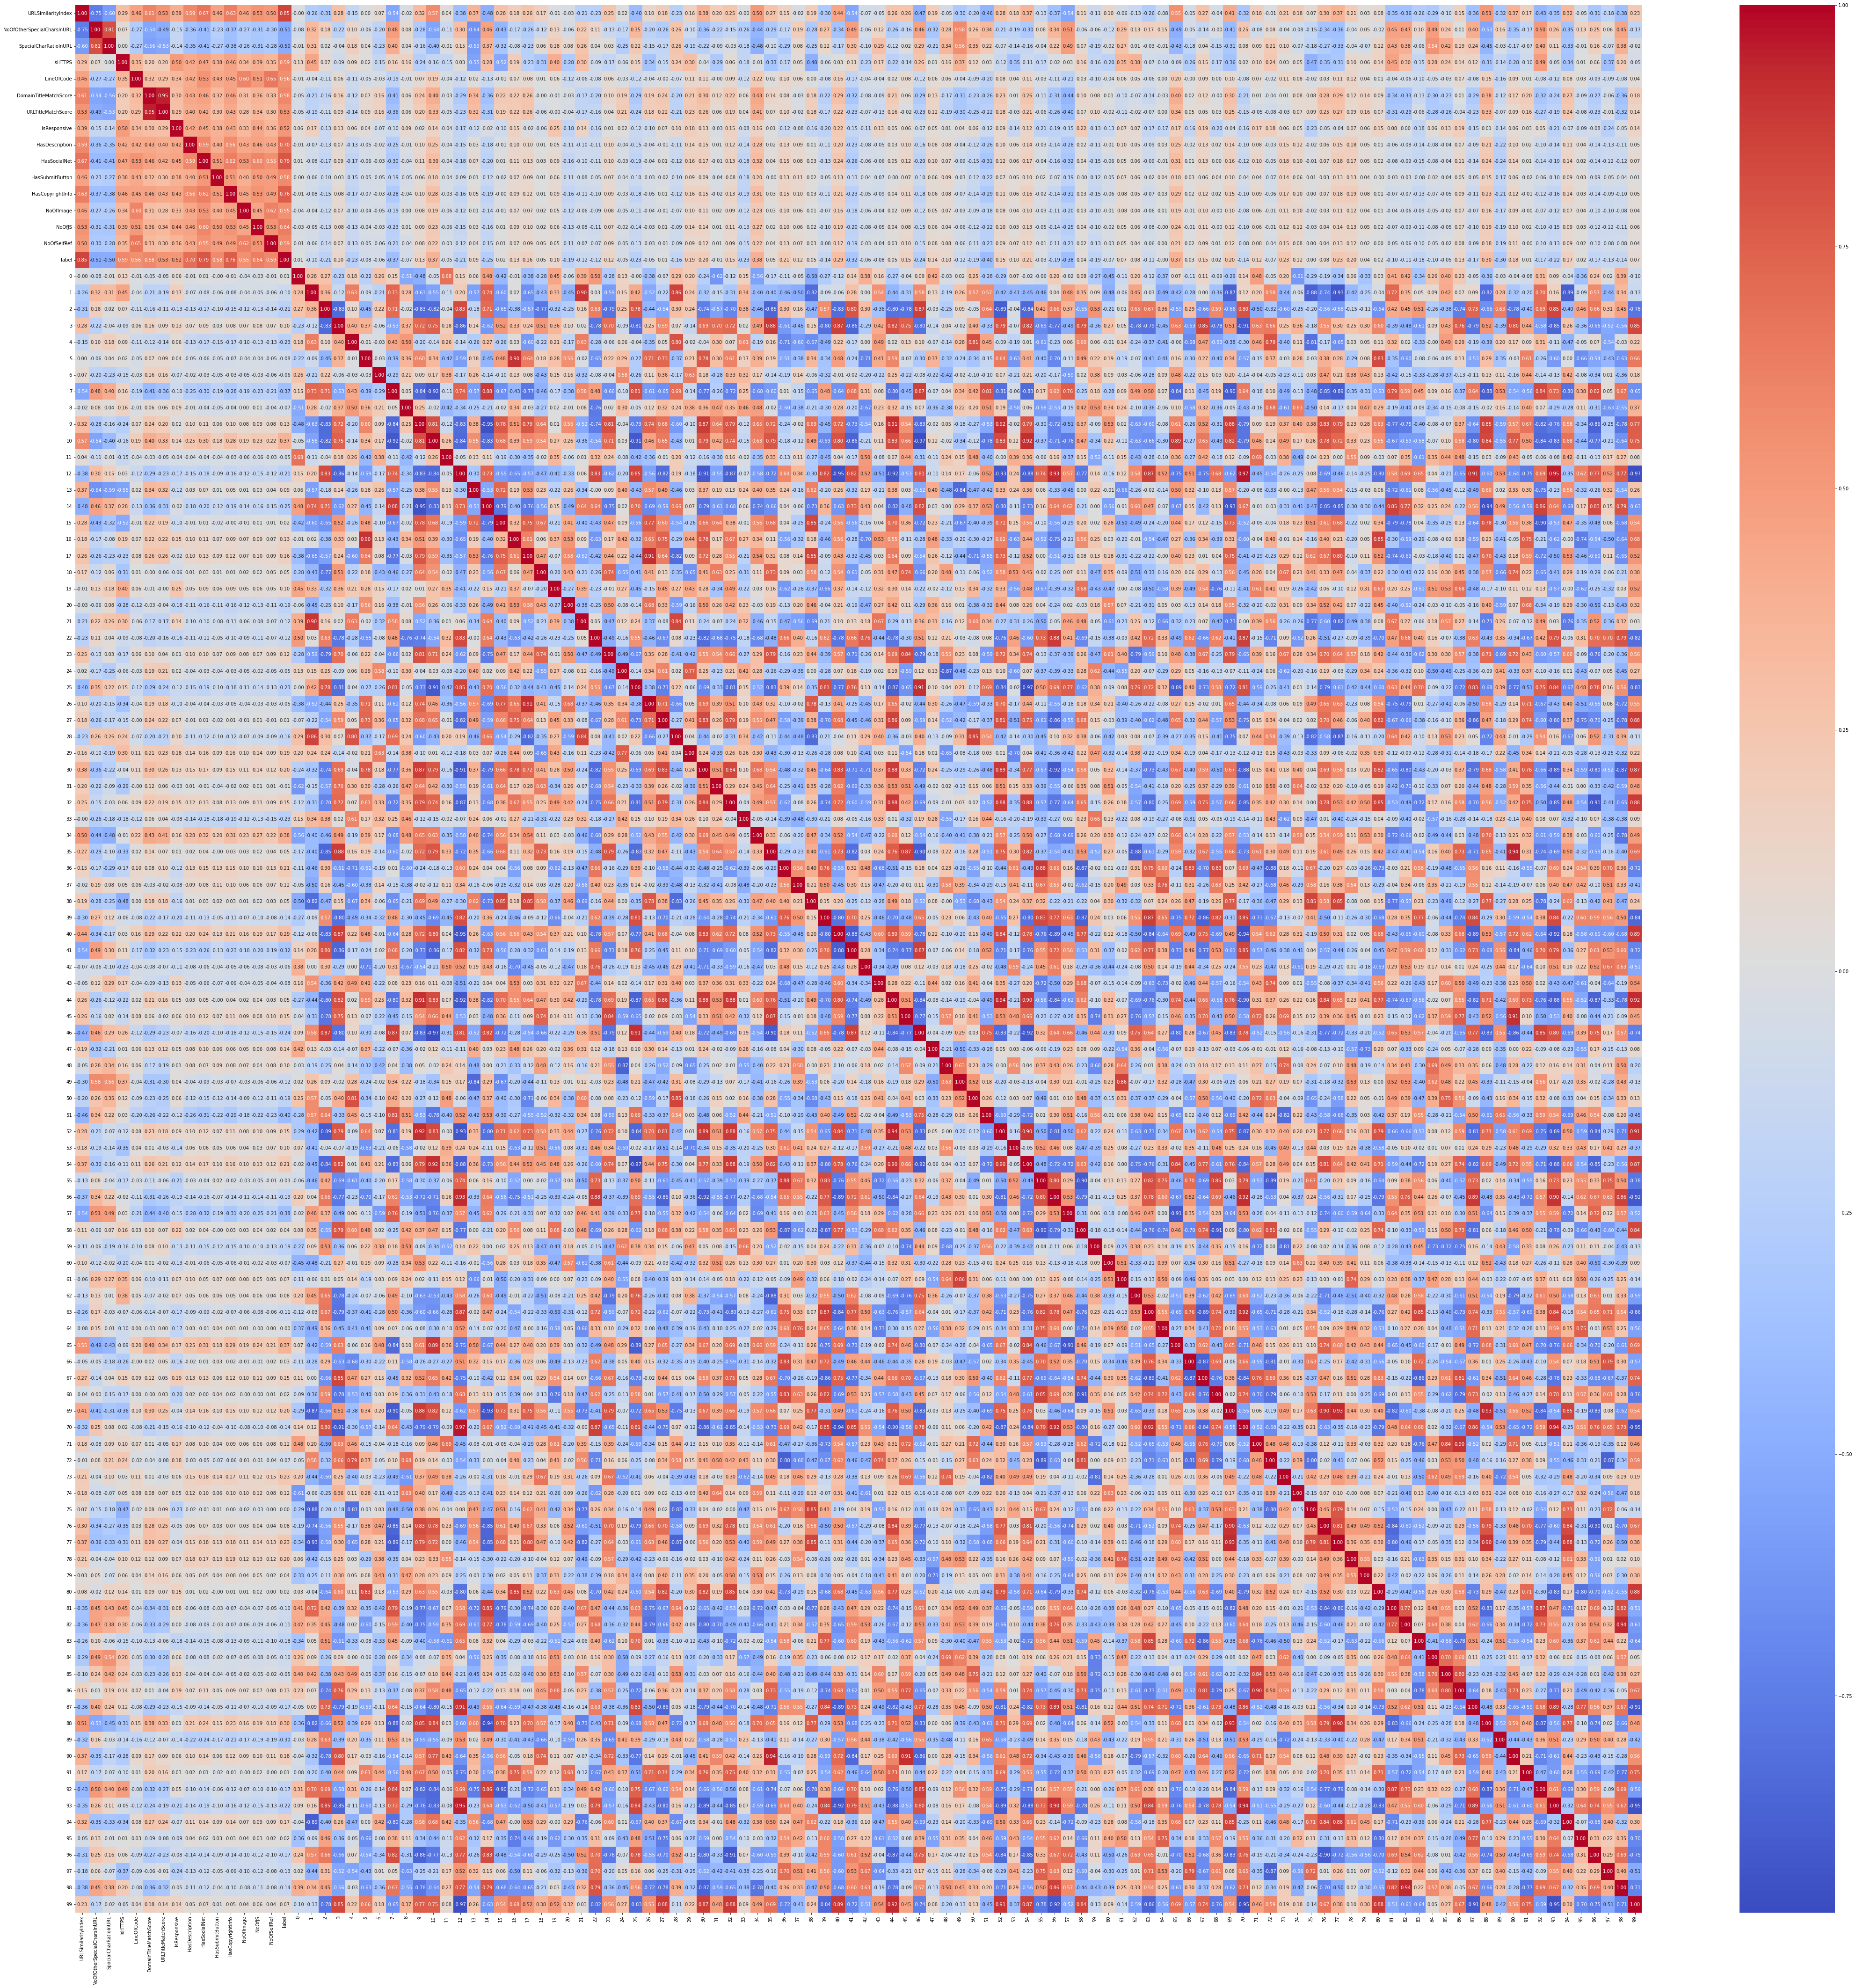

                            URLSimilarityIndex  NoOfOtherSpecialCharsInURL  \
URLSimilarityIndex                    1.000000                   -0.749040   
NoOfOtherSpecialCharsInURL           -0.749040                    1.000000   
SpacialCharRatioInURL                -0.595951                    0.807249   
IsHTTPS                               0.289131                    0.065941   
LineOfCode                            0.463567                   -0.271495   
...                                        ...                         ...   
95                                   -0.047534                    0.129305   
96                                   -0.313715                    0.245500   
97                                   -0.182852                    0.061670   
98                                   -0.379241                    0.446463   
99                                    0.226995                   -0.172991   

                            SpacialCharRatioInURL   IsHTTPS  Li

In [12]:
plt.figure(figsize=(75, 75))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.savefig('correlation_matrix.png')
plt.show()

# Display the correlation matrix
print(correlation_matrix)

In [13]:
# CORRELATION_THRESHOLD = 0.3

# # Get the features that are highly correlated with the target but not part of the URL vector
# correlated_features = correlation_matrix['label'][abs(correlation_matrix['label']) > CORRELATION_THRESHOLD].index

# # Display the highly correlated features
# print(correlated_features)

# Drop all features that are not highly correlated with the target
combined_df = combined_df.drop(columns=['NoOfOtherSpecialCharsInURL', 'URLTitleMatchScore', 'URLSimilarityIndex'])

# Display the new dataframe
combined_df.head()

# change all column labels to strings
combined_df.columns = [str(col) for col in combined_df.columns]

In [14]:
combined_df.head()

SpacialCharRatioInURL  IsHTTPS  LineOfCode  DomainTitleMatchScore  \
55693                   0.143        1         108                    0.0   
52794                   0.103        1           9                    0.0   
145305                  0.111        1          58                    0.0   
72762                   0.033        1           9                    0.0   
28644                   0.100        1          63                    0.0   

        IsResponsive  HasDescription  HasSocialNet  HasSubmitButton  \
55693              1               0             0                0   
52794              0               0             0                0   
145305             0               1             0                0   
72762              0               0             0                0   
28644              1               1             0                0   

        HasCopyrightInfo  NoOfImage  ...        90        91        92  \
55693                  0          0  ...  0.658056 -0.628911  1.267703   
52794                  0          0  ...  0.685798 -0.673196  1.290214   
145305                 0          0  ... -0.164634  0.569187  1.707360   
72762                  0          0  ...  0.596609 -0.525796  0.226363   
28644                  0          1  ...  0.552420 -0.828975  0.894816   

              93        94        95        96        97        98        99  
55693   0.920806 -0.855756  0.414394  1.347006 -0.362787  0.833028 -0.767152  
52794   0.963175 -0.866103  0.469906  1.386637 -0.361204  0.872950 -0.797612  
145305  2.313258 -0.508839  1.345775  0.425635 -0.592873  0.204356 -1.827242  
72762   1.051644  0.045617  1.354572  0.297421 -0.151188 -0.133119 -1.089047  
28644   1.107233 -0.127113  1.077831  0.346433 -0.011802  0.630110 -1.077826  

[5 rows x 113 columns]

In [15]:
print(combined_df.shape[0])

144074


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

RANDOM_STATE = 42

sklearn_models = {
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'Logistic Regression': LogisticRegression(random_state=RANDOM_STATE, max_iter=combined_df.shape[0]),
    'Support Vector Machine': SVC(random_state=RANDOM_STATE, probability=True),
    'XGBoost': XGBClassifier(random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='logloss') ,
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=2)
}

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# normalize every column except the target and IsHTTPS, IsResponsive, HasDescription, HasSocialNet, HasSubmitButton, HasCopyrightInfo, SpecialCharRatioInURL
scaler = StandardScaler()

normalized_df = combined_df.copy()
normalized_df[normalized_df.columns.difference(['label', 'IsHTTPS', 'IsResponsive', 'HasDescription', 'HasSocialNet', 'HasSubmitButton', 'HasCopyrightInfo'])] = scaler.fit_transform(normalized_df[normalized_df.columns.difference(['label', 'IsHTTPS', 'IsResponsive', 'HasDescription', 'HasSocialNet', 'HasSubmitButton', 'HasCopyrightInfo'])])

X = normalized_df.drop(columns=['label'])
y = normalized_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

normalized_df.head()

SpacialCharRatioInURL  IsHTTPS  LineOfCode  DomainTitleMatchScore  \
55693                2.637045        1   -0.515259              -0.936592   
52794                1.313194        1   -0.598916              -0.936592   
145305               1.577964        1   -0.557510              -0.936592   
72762               -1.003545        1   -0.598916              -0.936592   
28644                1.213905        1   -0.553285              -0.936592   

        IsResponsive  HasDescription  HasSocialNet  HasSubmitButton  \
55693              1               0             0                0   
52794              0               0             0                0   
145305             0               1             0                0   
72762              0               0             0                0   
28644              1               1             0                0   

        HasCopyrightInfo  NoOfImage  ...        90        91        92  \
55693                  0  -0.583629  ...  0.295194 -0.068145  1.481954   
52794                  0  -0.583629  ...  0.374636 -0.202589  1.516749   
145305                 0  -0.583629  ... -2.060652  3.569169  2.161533   
72762                  0  -0.583629  ...  0.119237  0.244903 -0.127649   
28644                  0  -0.548692  ... -0.007305 -0.675520  0.905581   

              93        94        95        96        97        98        99  
55693  -0.642467 -2.454879 -2.486777  1.696147 -1.124189  1.347169  0.932779  
52794  -0.557631 -2.486483 -2.329351  1.780423 -1.118788  1.424978  0.872669  
145305  2.145663 -1.395158  0.154508 -0.263127 -1.908930  0.121880 -1.159186  
72762  -0.380488  0.298529  0.179456 -0.535771 -0.402500 -0.535862  0.297556  
28644  -0.269182 -0.229106 -0.605349 -0.431548  0.072899  0.951679  0.319700  

[5 rows x 113 columns]

In [30]:
def train_model(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    return accuracy, report, confusion

In [31]:
results = {}

In [32]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=RANDOM_STATE, shuffle=True)

for name, model in sklearn_models.items():
    models = []
    accuracy = []
    report = []
    confusion = []
    roc_aucs = []
    fprs = []
    tprs = []

    for train_index, test_index in kf.split(X):
        print(f'Training {name} model...')
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        y_pred = train_model(model, X_train, y_train, X_test)
        acc, rep, conf = evaluate_model(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

        models.append(model)
        accuracy.append(acc)
        report.append(rep)
        confusion.append(conf)
        roc_aucs.append(roc_auc)
        fprs.append(fpr)
        tprs.append(tpr)
    

    results[name] = {
        'model': models,
        'accuracy': accuracy,
        'report': report,
        'confusion': confusion,
        'roc_auc': roc_aucs,
        'fpr': fprs,
        'tpr': tprs
    }

Training Random Forest model...
Training Random Forest model...
Training Random Forest model...
Training Random Forest model...
Training Random Forest model...
Training Logistic Regression model...
Training Logistic Regression model...
Training Logistic Regression model...
Training Logistic Regression model...
Training Logistic Regression model...
Training Support Vector Machine model...
Training Support Vector Machine model...
Training Support Vector Machine model...
Training Support Vector Machine model...
Training Support Vector Machine model...
Training XGBoost model...
Training XGBoost model...
Training XGBoost model...
Training XGBoost model...
Training XGBoost model...
Training K-Nearest Neighbors model...
Training K-Nearest Neighbors model...
Training K-Nearest Neighbors model...
Training K-Nearest Neighbors model...
Training K-Nearest Neighbors model...


In [36]:
for name, result in results.items():
    print(f'{name}:\n')
    for i in range(5):
        print(f'Fold {i+1}:\n')
        print(f'Accuracy: {result["accuracy"][i]}\n')
        print(f'Report: {result["report"][i]}\n')
        print(f'Confusion Matrix:\n{result["confusion"][i]}\n')
        print('\n')

Random Forest:

Fold 1:

Accuracy: 0.9997917751171265

Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14561
           1       1.00      1.00      1.00     14254

    accuracy                           1.00     28815
   macro avg       1.00      1.00      1.00     28815
weighted avg       1.00      1.00      1.00     28815


Confusion Matrix:
[[14556     5]
 [    1 14253]]



Fold 2:

Accuracy: 0.9995835502342529

Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14223
           1       1.00      1.00      1.00     14592

    accuracy                           1.00     28815
   macro avg       1.00      1.00      1.00     28815
weighted avg       1.00      1.00      1.00     28815


Confusion Matrix:
[[14212    11]
 [    1 14591]]



Fold 3:

Accuracy: 0.9996876626756898

Report:               precision    recall  f1-score   support

           0       1.00     

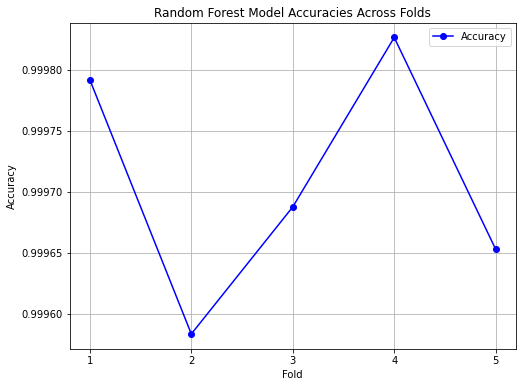

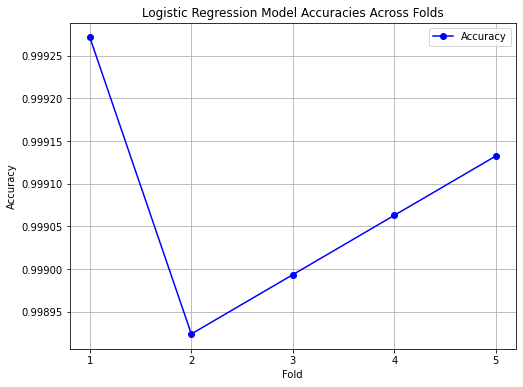

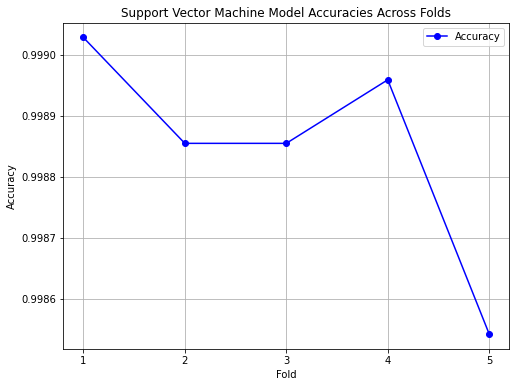

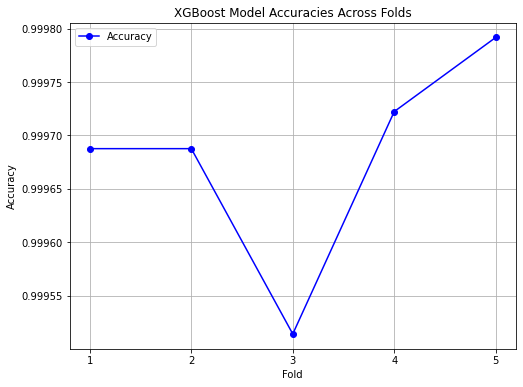

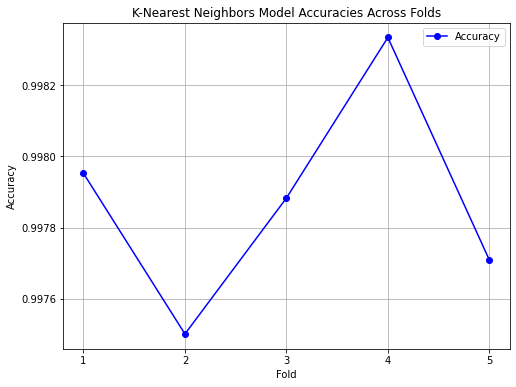

In [113]:
# Iterate through the results to plot each model's accuracies
for name, result in results.items():
    fig, ax = plt.subplots(figsize=(8, 6))
    folds = np.arange(1, len(result["accuracy"]) + 1)
    ax.plot(folds, result["accuracy"], marker='o', linestyle='-', color='b', label='Accuracy')
    ax.set_xlabel('Fold')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'{name} Model Accuracies Across Folds')
    ax.set_xticks(folds)
    ax.grid(True)
    ax.legend()
    plt.show()


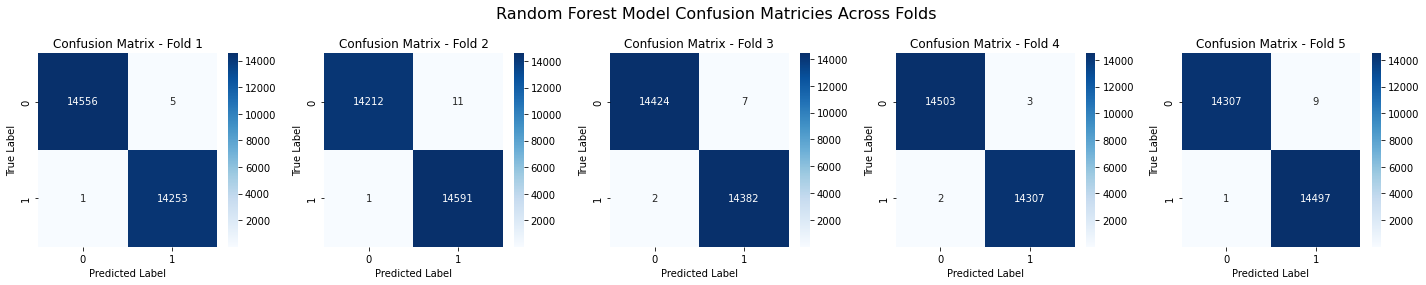

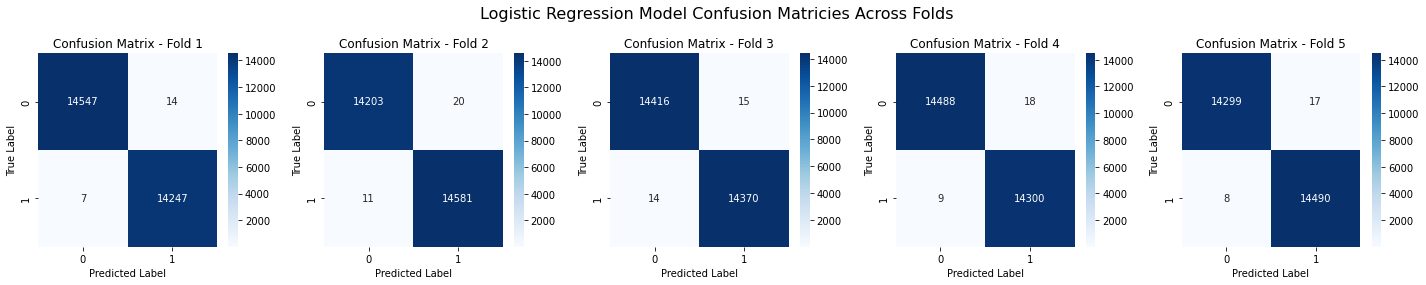

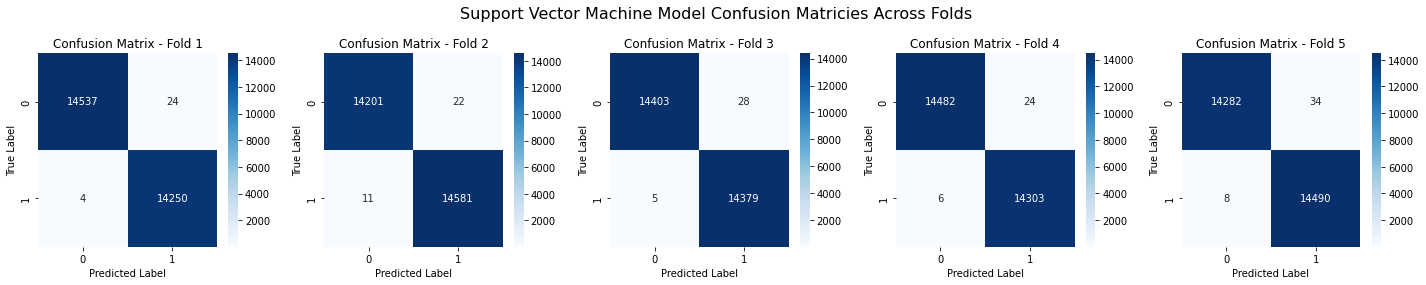

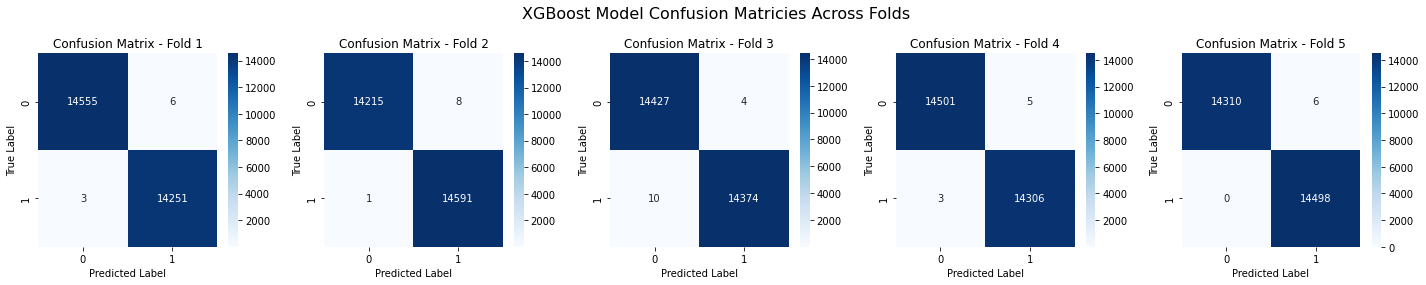

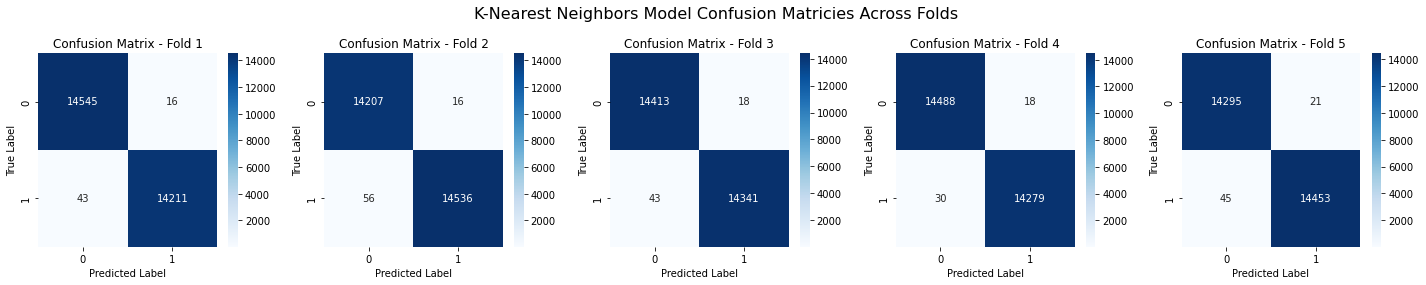

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

for name, result in results.items():
    confusion_matrices = results[name]["confusion"]
    
    # Create a 1x5 grid of subplots
    fig, axs = plt.subplots(1, 5, figsize=(20, 4))
    fig.suptitle(f'{name} Model Confusion Matricies Across Folds', fontsize=16)

    
    # Iterate over each confusion matrix and corresponding subplot
    for i, (matrix, ax) in enumerate(zip(confusion_matrices, axs)):
        # Plot the confusion matrix as a heatmap
        sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
        
        # Set labels and title for each subplot
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
        ax.set_title(f'Confusion Matrix - Fold {i+1}')

    # Adjust layout to prevent overlap
    plt.tight_layout()
        
    # Show the plot
    plt.show()


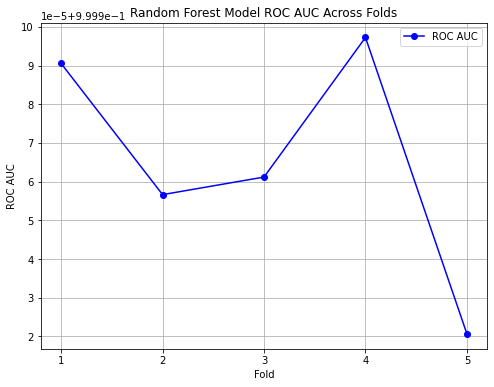

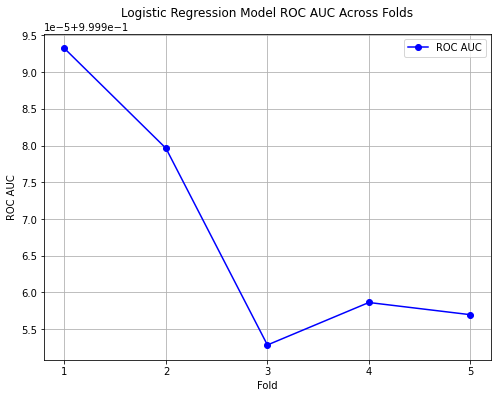

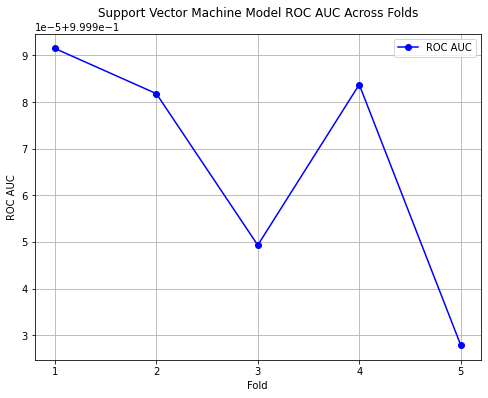

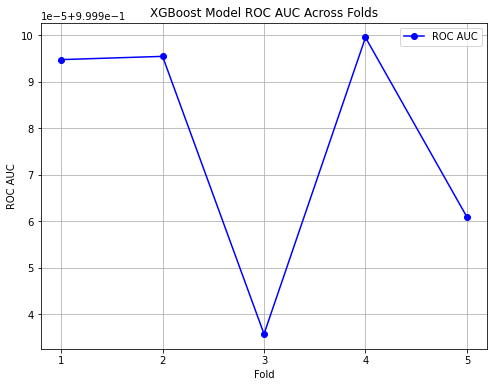

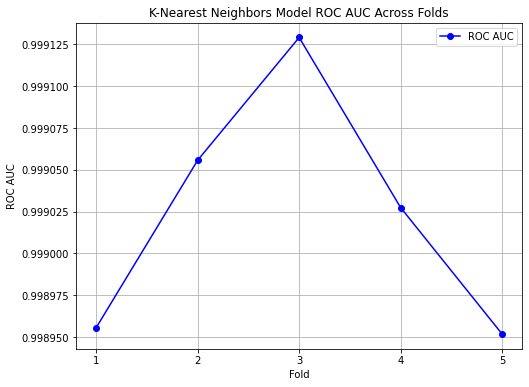

In [114]:
# Iterate through the results to plot each model's ROC AUC
for name, result in results.items():
    fig, ax = plt.subplots(figsize=(8, 6))
    folds = np.arange(1, len(result["roc_auc"]) + 1)
    ax.plot(folds, result["roc_auc"], marker='o', linestyle='-', color='b', label='ROC AUC')
    ax.set_xlabel('Fold')
    ax.set_ylabel('ROC AUC')
    ax.set_title(f'{name} Model ROC AUC Across Folds')
    ax.set_xticks(folds)
    ax.grid(True)
    ax.legend()
    plt.show()


In [92]:
max_accuracy = []
min_fps = []
min_fns = []
max_roc_aucs = []

for name, result in results.items():
    min_fp = 1000
    min_fn = 1000
    max_accuracy.append(max(results[name]['accuracy']))
    max_roc_aucs.append(max(results[name]['roc_auc']))
    for matrix in results[name]['confusion']:
        if matrix[0][1] < min_fp:
            min_fp = matrix[0][1] 

        if matrix[1][0] < min_fn:
            min_fn = matrix[1][0]
    min_fps.append(min_fp)
    min_fns.append(min_fn)


print(max_accuracy)
print(max_roc_aucs)
print(min_fps)
print(min_fns)


[0.999826479264272, 0.9992712129099427, 0.9990282838799236, 0.9997917678906088, 0.998334200937012]
[0.999997249072458, 0.9999932161740248, 0.9999914864911236, 0.9999995567682419, 0.9991291771113802]
[3, 14, 22, 4, 16]
[1, 7, 4, 0, 30]


In [96]:
import matplotlib.pyplot as plt

max_accuracy = [0.999826479264272, 0.9992712129099427, 0.9990282838799236, 0.9997917678906088, 0.998334200937012]
max_roc_aucs = [0.999997249072458, 0.9999932161740248, 0.9999914864911236, 0.9999995567682419, 0.9991291771113802]
min_fps = [3, 14, 22, 4, 16]
min_fns = [1, 7, 4, 0, 30]

# Create a list of model names
model_names = ['Random Forest', 'Logistic Regression', 'Support Vector Machine', 'XGBoost', 'KNN']

# Create a figure with 1x4 subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 6))

# Plotting max_accuracy
axs[0].plot(model_names, max_accuracy, marker='o', linestyle='-', color='b')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Max Accuracy Across Models')

# Plotting max_roc_aucs
axs[1].plot(model_names, max_roc_aucs, marker='o', linestyle='-', color='r')
axs[1].set_ylabel('ROC AUC')
axs[1].set_title('Max ROC AUC Across Models')

# Plotting min_fps
axs[2].plot(model_names, min_fps, marker='o', linestyle='-', color='g')
axs[2].set_ylabel('False Positives')
axs[2].set_title('Min False Positives Across Models')

# Plotting min_fns
axs[3].plot(model_names, min_fns, marker='o', linestyle='-', color='m')
axs[3].set_ylabel('False Negatives')
axs[3].set_title('Min False Negatives Across Models')

# Rotate x-axis labels for better readability
for ax in axs:
    ax.tick_params(axis='x', rotation=45)import matplotlib.pyplot as plt

max_accuracy = [0.999826479264272, 0.9992712129099427, 0.9990282838799236, 0.9997917678906088, 0.998334200937012]
max_roc_aucs = [0.999997249072458, 0.9999932161740248, 0.9999914864911236, 0.9999995567682419, 0.9991291771113802]
min_fps = [3, 14, 22, 4, 16]
min_fns = [1, 7, 4, 0, 30]

# Create a list of model names
model_names = ['Random Forest', 'Logistic Regression', 'Support Vector Machine', 'XGBoost', 'KNN']

# Create a figure with 1x4 subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 6))

# Plotting max_accuracy
for i, (acc, model) in enumerate(zip(max_accuracy, model_names)):
    axs[0].plot(model, acc, marker='o', color='b')
    axs[0].text(i, acc, f'{acc:.4f}', ha='center', va='bottom', fontsize=8)

axs[0].set_ylabel('Accuracy')
axs[0].set_title('Max Accuracy Across Models')

# Plotting max_roc_aucs
for i, (auc, model) in enumerate(zip(max_roc_aucs, model_names)):
    axs[1].plot(model, auc, marker='o', color='r')
    axs[1].text(i, auc, f'{auc:.4f}', ha='center', va='bottom', fontsize=8)

axs[1].set_ylabel('ROC AUC')
axs[1].set_title('Max ROC AUC Across Models')

# Plotting min_fps
for i, (fp, model) in enumerate(zip(min_fps, model_names)):
    axs[2].plot(model, fp, marker='o', color='g')
    axs[2].text(i, fp, f'{fp}', ha='center', va='bottom', fontsize=8)

axs[2].set_ylabel('False Positives')
axs[2].set_title('Min False Positives Across Models')

# Plotting min_fns
for i, (fn, model) in enumerate(zip(min_fns, model_names)):
    axs[3].plot(model, fn, marker='o', color='m')
    axs[3].text(i, fn, f'{fn}', ha='center', va='bottom', fontsize=8)

axs[3].set_ylabel('False Negatives')
axs[3].set_title('Min False Negatives Across Models')

# Rotate x-axis labels for better readability
for ax in axs:
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


SyntaxError: invalid syntax (2311042456.py, line 36)

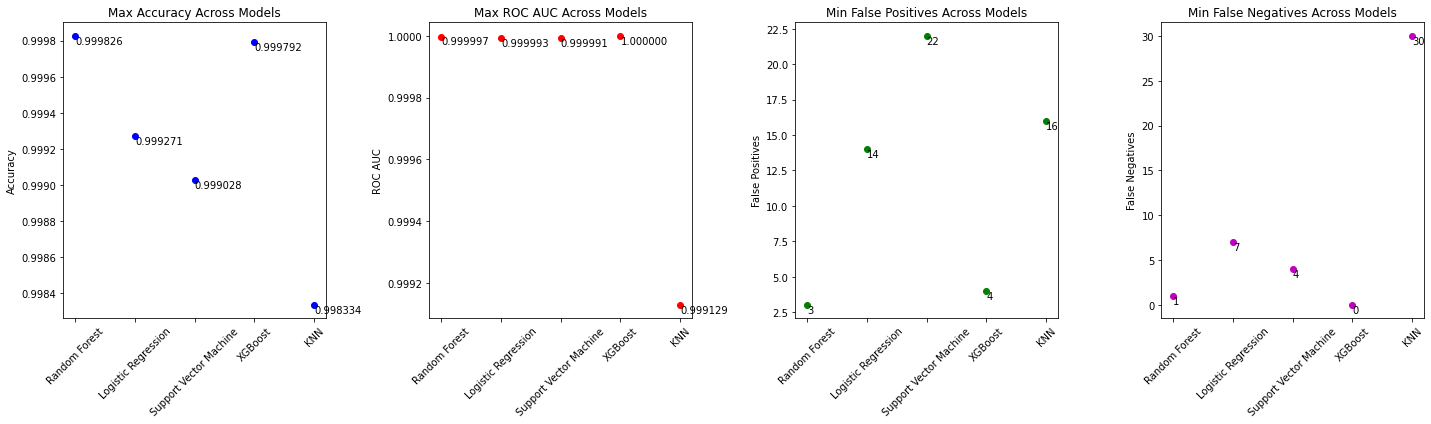

In [108]:
import matplotlib.pyplot as plt

max_accuracy = [0.999826479264272, 0.9992712129099427, 0.9990282838799236, 0.9997917678906088, 0.998334200937012]
max_roc_aucs = [0.999997249072458, 0.9999932161740248, 0.9999914864911236, 0.9999995567682419, 0.9991291771113802]
min_fps = [3, 14, 22, 4, 16]
min_fns = [1, 7, 4, 0, 30]

# Create a list of model names
model_names = ['Random Forest', 'Logistic Regression', 'Support Vector Machine', 'XGBoost', 'KNN']

# Create a figure with 1x4 subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 6))

# Plotting max_accuracy
for i, (acc, model) in enumerate(zip(max_accuracy, model_names)):
    axs[0].plot(model, acc, marker='o', color='b')
    axs[0].text(i, acc, f'{acc:.6f}', ha='left', va='top', fontsize=10)

axs[0].set_ylabel('Accuracy')
axs[0].set_title('Max Accuracy Across Models')

# Plotting max_roc_aucs
for i, (auc, model) in enumerate(zip(max_roc_aucs, model_names)):
    axs[1].plot(model, auc, marker='o', color='r')
    axs[1].text(i, auc, f'{auc:.6f}', ha='left', va='top', fontsize=10)

axs[1].set_ylabel('ROC AUC')
axs[1].set_title('Max ROC AUC Across Models')

# Plotting min_fps
for i, (fp, model) in enumerate(zip(min_fps, model_names)):
    axs[2].plot(model, fp, marker='o', color='g')
    axs[2].text(i, fp, f'{fp}', ha='left', va='top', fontsize=10)

axs[2].set_ylabel('False Positives')
axs[2].set_title('Min False Positives Across Models')

# Plotting min_fns
for i, (fn, model) in enumerate(zip(min_fns, model_names)):
    axs[3].plot(model, fn, marker='o', color='m')
    axs[3].text(i, fn, f'{fn}', ha='left', va='top', fontsize=10)

axs[3].set_ylabel('False Negatives')
axs[3].set_title('Min False Negatives Across Models')

# Rotate x-axis labels for better readability
for ax in axs:
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Train and evaluate models, collect results
for name, model in sklearn_models.items():
    print(f'Training {name} model...')
    models = []
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    confusion_matrices = []
    roc_aucs = []
    fprs = []
    tprs = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        y_pred = train_model(model, X_train, y_train, X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        confusion = confusion_matrix(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

        models.append(model)
        accuracies.append(accuracy)
        precisions.append(report['weighted avg']['precision'])
        recalls.append(report['weighted avg']['recall'])
        f1_scores.append(report['weighted avg']['f1-score'])
        confusion_matrices.append(confusion)
        roc_aucs.append(roc_auc)
        fprs.append(fpr)
        tprs.append(tpr)

    results[name] = {
        'model': models,
        'accuracy': accuracies,
        'precision': precisions,
        'recall': recalls,
        'f1_score': f1_scores,
        'confusion_matrix': confusion_matrices,
        'roc_auc': roc_aucs,
        'fpr': fprs,
        'tpr': tprs
    }

# Print metrics for each model and fold
for name, result in results.items():
    print(f'{name}:\n')
    for i in range(5):
        print(f'Fold {i+1}:\n')
        print(f'Accuracy: {result["accuracy"][i]:.4f}')
        print(f'Precision: {result["precision"][i]:.4f}')
        print(f'Recall: {result["recall"][i]:.4f}')
        print(f'F1 Score: {result["f1_score"][i]:.4f}')
        print(f'Confusion Matrix:\n{result["confusion_matrix"][i]}\n')
        print(f'ROC AUC: {result["roc_auc"][i]:.4f}\n')
        print('\n')

# Plotting
def plot_metrics(metric_name):
    plt.figure(figsize=(12, 6))
    for name, result in results.items():
        plt.plot(range(1, 6), result[metric_name], label=name)
    plt.title(f'{metric_name.capitalize()} over 5 Folds')
    plt.xlabel('Fold')
    plt.ylabel(metric_name.capitalize())
    plt.legend()
    plt.show()

plot_metrics('accuracy')
plot_metrics('precision')
plot_metrics('recall')
plot_metrics('f1_score')

# Plot confusion matrices for each model (first fold only for simplicity)
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Confusion Matrices (Fold 1)')
for ax, (name, result) in zip(axs.flatten(), results.items()):
    sns.heatmap(result['confusion_matrix'][0], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot ROC AUC curves for all models (first fold only for simplicity)
plt.figure(figsize=(12, 8))
for name, result in results.items():
    plt.plot(result['fpr'][0], result['tpr'][0], label=f'{name} (AUC = {result["roc_auc"][0]:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC AUC Curves (Fold 1)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Training Random Forest model...


KeyboardInterrupt: 

In [62]:
import pickle

for name, result in results.items():
    if type(result['model']) == list:
        j = 0
        for i in range(5):
            with open(f'models/{name}_fold_{i}.pkl', 'wb') as file:
                pickle.dump(result['model'][i], file)
            j += 1

    else:
        with open(f'models/{name}.pkl', 'wb') as file:
            pickle.dump(result['model'], file)

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

neural_networks = {
    'nn1': Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]),
    'nn2': Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]),
    'nn3': Sequential([
        Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
}

/home/rasooly/miniconda3/envs/ECS171Project/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

def train_neural_network(model, X_train, y_train, X_test, y_test):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[early_stopping], verbose=2)
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    return y_pred

In [ ]:
for name, model in neural_networks.items():
    print(f'Training {name}...')
    y_pred = train_neural_network(model, X_train, y_train, X_test, y_test)
    accuracy, report, confusion = evaluate_model(y_test, y_pred)
    print(f'{name} accuracy: {accuracy}')
    print(report)
    print(confusion)
    print()

    results[name] = {
        'accuracy': accuracy,
        'report': report,
        'confusion': confusion
    }

Training nn1...
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step
nn1 accuracy: 0.9994447336456707
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14561
           1       1.00      1.00      1.00     14254

    accuracy                           1.00     28815
   macro avg       1.00      1.00      1.00     28815
weighted avg       1.00      1.00      1.00     28815

[[14550    11]
 [    5 14249]]

Training nn2...
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step
nn2 accuracy: 0.9993059170570883
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14561
           1       1.00      1.00      1.00     14254

    accuracy                           1.00     28815
   macro avg       1.00      1.00      1.00     28815
weighted avg       1.00      1.00      1.00     28815

[[14549    12]
 [    8 14246]]

Training nn3...
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step
nn3 accuracy: 0.9994100294985251
      